/kaggle/input/hackathon2021/sample_submission.csv
/kaggle/input/hackathon2021/train.csv/train.csv
/kaggle/input/hackathon2021/test.csv/test.csv
Epoch 1/8
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5996 - accuracy: 0.8463
Epoch 2/8
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1832 - accuracy: 0.9463
Epoch 3/8
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1243 - accuracy: 0.9644
Epoch 4/8
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0882 - accuracy: 0.9750
Epoch 5/8
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0686 - accuracy: 0.9806
Epoch 6/8
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0494 - accuracy: 0.9854
Epoch 7/8
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0389 - accuracy: 0.9897
Epoch 8/8
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0324 - accuracy: 0.9916
       ImageID  Label
0            1      2
1   

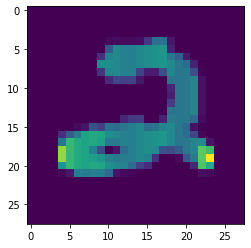

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.utils import normalize
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
#reading the train.csv and test.csv files     
trainset=pd.read_csv('/kaggle/input/hackathon2021/train.csv/train.csv')
testset=pd.read_csv('/kaggle/input/hackathon2021/test.csv/test.csv')
#extracting 'label' from train.csv i.e.., trainset
trainlabel=trainset['label'].copy()
#deleting 'label' from train.csv i.e.., trainset
trainset.drop(['label'],axis=1,inplace=True)
#converting dataframes of trainset into arrays using numpy
trainset=np.array(trainset)
#reshaping the trainset from(42000,784) to (42000,28,28)
trainset=trainset.reshape(42000,28,28)
#converting dataframes of testset into arrays using numpy
testset=np.array(testset)
#reshaping testset from (28000,784) to (28000,28,28)
testset=testset.reshape(28000,28,28)
#normalizing the training and testing sets using an inbuilt method "normalize()" without actually dividing by 255.0
trainset=normalize(trainset,axis=1)
testset=normalize(testset,axis=1)


#Building the model
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(128,activation="relu"),
                                tf.keras.layers.Dense(10,activation=tf.nn.softmax)])


#compiling the model
model.compile(optimizer=tf.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#training the model
model.fit(trainset,trainlabel,epochs=8,batch_size=32)



prediction=model.predict(testset)


#generating a submission file containing IMAGEID and LABEL
final=prediction.argmax(axis=-1)
sub_file=pd.DataFrame()
sub_file['ImageID']=list(range(1,28001))
sub_file['Label']=final
#displaying the submission file
print(sub_file)
#converting the submission file into csv
sub_file.to_csv("output_file.csv",index=False)
#testing the model with a sample test input
plt.imshow(testset[0])
print(np.argmax(prediction[0]))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session